In [2]:
!pip install tensorflow

In [3]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

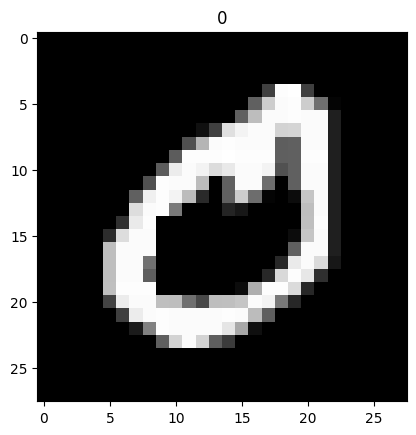

In [4]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [5]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [7]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [9]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [12]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [13]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4520 - accuracy: 0.8642 - val_loss: 0.1710 - val_accuracy: 0.9496
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2293 - accuracy: 0.9332 - val_loss: 0.1389 - val_accuracy: 0.9589
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1878 - accuracy: 0.9461 - val_loss: 0.1184 - val_accuracy: 0.9656
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1652 - accuracy: 0.9523 - val_loss: 0.1054 - val_accuracy: 0.9692
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1507 - accuracy: 0.9571 - val_loss: 0.0985 - val_accuracy: 0.9712
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1401 - accuracy: 0.9591 - val_loss: 0.0978 - val_accuracy: 0.9689
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1294 - accuracy: 0.9622 - val_loss: 0.0996 - val_accuracy

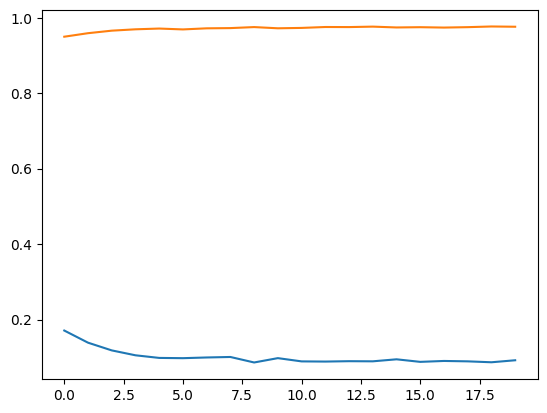

In [14]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [15]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 3ms/step


array([[5.8705469e-15, 2.2636757e-09, 2.4076087e-08, ..., 9.9999315e-01,
        5.5624075e-11, 3.5688066e-07],
       [3.5860946e-13, 2.4058966e-09, 9.9999362e-01, ..., 5.8436893e-07,
        4.1819695e-10, 1.0659291e-17],
       [1.4702597e-13, 9.9995154e-01, 2.8232751e-07, ..., 6.2991944e-06,
        4.0864059e-05, 5.4980935e-09],
       ...,
       [6.7678163e-14, 3.2072935e-09, 5.2054972e-08, ..., 5.8852393e-08,
        2.5350291e-10, 3.5724831e-06],
       [5.1770040e-14, 4.9735860e-15, 5.0592766e-11, ..., 5.3493820e-11,
        1.4855902e-09, 1.7457600e-11],
       [1.4483029e-10, 2.2354193e-21, 7.6201202e-15, ..., 1.8086705e-19,
        1.2999636e-12, 1.8168805e-17]], dtype=float32)

In [16]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 969,    1,    0,    0,    0,    0,    6,    1,    3,    0],
       [   0, 1121,    1,    2,    0,    0,    2,    0,    9,    0],
       [   1,    2,  994,   12,    5,    1,    1,    9,    7,    0],
       [   0,    0,    2,  988,    0,   12,    0,    5,    2,    1],
       [   1,    0,    2,    0,  964,    0,    5,    2,    0,    8],
       [   3,    0,    0,    8,    1,  866,    4,    3,    4,    3],
       [   4,    3,    0,    2,    4,    4,  937,    0,    4,    0],
       [   2,    3,    4,    4,    1,    0,    0, 1011,    0,    3],
       [   5,    1,    0,    7,    4,    3,    0,    6,  945,    3],
       [   0,    3,    0,    8,   14,    3,    2,    9,    5,  965]])

In [17]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 26ms/step


[4]